In [1]:
import pandas as pd 
import numpy as np 
import math
from datetime import datetime
import random
import tensorflow as tf

import sklearn 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random.seed(1000)
np.random.seed(1000)

# Preapring Data


In [78]:
train_data=pd.read_csv('train.csv')
sample=pd.read_csv('sample_sub.csv')
client_data=pd.read_csv('client_data.csv')
payment_hist=pd.read_csv('payment_history.csv')
policy_data=pd.read_csv('policy_data.csv')

## Policy Data 

In [79]:
len(policy_data)

282815

In [80]:
policy_data=policy_data.drop_duplicates()
print(len(policy_data['Policy ID'].unique()))
print(len(policy_data))

51685
278988


In [82]:
policy_data.head()

,Policy ID,NP2_EFFECTDATE,PPR_PRODCD,NPR_PREMIUM,NPH_LASTNAME,CLF_LIFECD,NSP_SUBPROPOSAL,NPR_SUMASSURED,NLO_TYPE,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY
0,PID_EPZDSP8,1/9/2019,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_BPN2LEB,2,222,NaN,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB
1,PID_6M6G9IB,1/8/2018,PPR_PRODCD_64QNIHM,2795.069380,NPH_LASTNAME_U2H3GC6,1,111,213380.713197,NLO_TYPE_XTHV3A3,609.054794,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV
2,PID_UL0F7LH,1/8/2017,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,238857.872515,NLO_TYPE_XAJI0Y6,1339.461987,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO
3,PID_TRGUBTU,1/4/2018,PPR_PRODCD_KOFUYNN,3982.538095,NPH_LASTNAME_NPN3VGI,1,111,74968.903115,NLO_TYPE_XAJI0Y6,7870.961557,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M
4,PID_TODLPIB,1/12/2019,PPR_PRODCD_KOFUYNN,1143.953733,NPH_LASTNAME_9VSNH0E,3,555,238857.872515,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB


In [7]:
policy_data.dtypes

Policy ID           object
NP2_EFFECTDATE      object
PPR_PRODCD          object
NPR_PREMIUM        float64
NPH_LASTNAME        object
CLF_LIFECD           int64
NSP_SUBPROPOSAL      int64
NPR_SUMASSURED     float64
NLO_TYPE            object
NLO_AMOUNT         float64
AAG_AGCODE          object
PCL_LOCATCODE       object
OCCUPATION          object
CATEGORY            object
dtype: object

In [8]:
# Categorising the product code (PPR_PRODCD) and types of premiums (NLO_TYPE)
policy_data['PPR_PRODCD'] = pd.Categorical(policy_data['PPR_PRODCD'])
policy_data['NLO_TYPE'] = pd.Categorical(policy_data['NLO_TYPE'])

Clients subscribe to 17 product categories and they have also a choice among 6 premium types (NLO TYPES) to subscribe. These features are already categorical and the task is to encode them, resulting in two dataframes:dfProduct_Dummies and dfNLO_Dummies

In [9]:
policy_data['PPR_PRODCD'].unique()

[PPR_PRODCD_B2KVCE7, PPR_PRODCD_64QNIHM, PPR_PRODCD_KOFUYNN, PPR_PRODCD_165U4LY, PPR_PRODCD_EJ7YKFV, ..., PPR_PRODCD_KYXNF1V, PPR_PRODCD_ID7TAK9, PPR_PRODCD_6J9HUC7, PPR_PRODCD_8ZHO2CE, PPR_PRODCD_V6HBYGK]
Length: 17
Categories (17, object): [PPR_PRODCD_B2KVCE7, PPR_PRODCD_64QNIHM, PPR_PRODCD_KOFUYNN, PPR_PRODCD_165U4LY, ..., PPR_PRODCD_ID7TAK9, PPR_PRODCD_6J9HUC7, PPR_PRODCD_8ZHO2CE, PPR_PRODCD_V6HBYGK]

6 Premium types (NLO Types)

In [10]:
policy_data['NLO_TYPE'].unique()

[NLO_TYPE_DPBHSAH, NLO_TYPE_XTHV3A3, NLO_TYPE_XAJI0Y6, NLO_TYPE_4V30T9N, NLO_TYPE_ZMF8MDD, NLO_TYPE_T3W5UZB]
Categories (6, object): [NLO_TYPE_DPBHSAH, NLO_TYPE_XTHV3A3, NLO_TYPE_XAJI0Y6, NLO_TYPE_4V30T9N, NLO_TYPE_ZMF8MDD, NLO_TYPE_T3W5UZB]

In [11]:
dfProduct_Dummies = pd.get_dummies(policy_data['PPR_PRODCD'], prefix = 'category')
dfNLO_Dummies = pd.get_dummies(policy_data['NLO_TYPE'], prefix = 'category')

In [12]:
dfProduct_Dummies.head()

,category_PPR_PRODCD_165U4LY,category_PPR_PRODCD_64QNIHM,category_PPR_PRODCD_6J9HUC7,category_PPR_PRODCD_8ZHO2CE,category_PPR_PRODCD_APTRA9E,category_PPR_PRODCD_B2KVCE7,category_PPR_PRODCD_EJ7YKFV,category_PPR_PRODCD_GLE2MHV,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
# Adding Policy ID column for each of the Dummy variables dataframe
dfNLO_Dummies ['Policy ID'] = policy_data['Policy ID']
dfProduct_Dummies['Policy ID'] = policy_data['Policy ID']

In [14]:
dfNLO_Dummies.head()

,category_NLO_TYPE_4V30T9N,category_NLO_TYPE_DPBHSAH,category_NLO_TYPE_T3W5UZB,category_NLO_TYPE_XAJI0Y6,category_NLO_TYPE_XTHV3A3,category_NLO_TYPE_ZMF8MDD,Policy ID
0,0,1,0,0,0,0,PID_EPZDSP8
1,0,0,0,0,1,0,PID_6M6G9IB
2,0,0,0,1,0,0,PID_UL0F7LH
3,0,0,0,1,0,0,PID_TRGUBTU
4,0,1,0,0,0,0,PID_TODLPIB


In [15]:
dfNLO_Dummies=dfNLO_Dummies.groupby(by='Policy ID').sum()
dfProduct_Dummies=dfProduct_Dummies.groupby(by='Policy ID').sum()

In [16]:
dfProduct_Dummies.head()

,category_PPR_PRODCD_165U4LY,category_PPR_PRODCD_64QNIHM,category_PPR_PRODCD_6J9HUC7,category_PPR_PRODCD_8ZHO2CE,category_PPR_PRODCD_APTRA9E,category_PPR_PRODCD_B2KVCE7,category_PPR_PRODCD_EJ7YKFV,category_PPR_PRODCD_GLE2MHV,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER
Policy ID,,,,,,,,,,,,,,,,,
PID_000OJE4,0,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0
PID_000YE7B,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
PID_002B54Z,0,0,0,0,0,6,0,0,0,0,6,0,0,0,0,0,0
PID_0084LXN,0,0,0,0,0,7,0,0,0,0,7,0,0,0,0,0,0
PID_0098YXF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
policy_data.drop(['NPR_SUMASSURED'],axis=1,inplace=True)

#Marking 1 where NLO_AMOUNT was paid and 0 where its not paid
policy_data['NLO_AMOUNT'] = policy_data['NLO_AMOUNT'].fillna(0)
policy_data['NLO_AMOUNT'] = policy_data['NLO_AMOUNT'].apply(lambda x : 1 if x>0 else 0)

In [18]:
#change date to datetime type 
policy_data['NP2_EFFECTDATE'] = pd.to_datetime(pd.to_datetime(policy_data['NP2_EFFECTDATE']).dt.date)
policy_data.head()

,Policy ID,NP2_EFFECTDATE,PPR_PRODCD,NPR_PREMIUM,NPH_LASTNAME,CLF_LIFECD,NSP_SUBPROPOSAL,NLO_TYPE,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY
0,PID_EPZDSP8,2019-01-09,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_BPN2LEB,2,222,NLO_TYPE_DPBHSAH,0,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB
1,PID_6M6G9IB,2018-01-08,PPR_PRODCD_64QNIHM,2795.069380,NPH_LASTNAME_U2H3GC6,1,111,NLO_TYPE_XTHV3A3,1,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV
2,PID_UL0F7LH,2017-01-08,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,NLO_TYPE_XAJI0Y6,1,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO
3,PID_TRGUBTU,2018-01-04,PPR_PRODCD_KOFUYNN,3982.538095,NPH_LASTNAME_NPN3VGI,1,111,NLO_TYPE_XAJI0Y6,1,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M
4,PID_TODLPIB,2019-01-12,PPR_PRODCD_KOFUYNN,1143.953733,NPH_LASTNAME_9VSNH0E,3,555,NLO_TYPE_DPBHSAH,0,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB


In [19]:
stats_pdata = policy_data.groupby(by="Policy ID").agg({
    'NP2_EFFECTDATE':['min','max'],
})
stats_pdata.head()

NP2_EFFECTDATE           
                       min        max
Policy ID                            
PID_000OJE4     2019-01-03 2019-01-03
PID_000YE7B     2019-01-08 2019-01-08
PID_002B54Z     2019-01-07 2019-01-07
PID_0084LXN     2018-01-03 2018-01-03
PID_0098YXF     2017-01-12 2017-01-12

In [20]:
#stats_pdata.columns = ["_".join(x) for x in stats_pdata.columns.ravel()]
stats_pdata.columns = ["_".join(x) for x in stats_pdata.columns]
policy_data = pd.merge(policy_data,stats_pdata,on="Policy ID",how="left")
#Add counts 
policy_data['count'] = policy_data.groupby(by='Policy ID').transform('count')['NP2_EFFECTDATE']
policy_data.head()

,Policy ID,NP2_EFFECTDATE,PPR_PRODCD,NPR_PREMIUM,NPH_LASTNAME,CLF_LIFECD,NSP_SUBPROPOSAL,NLO_TYPE,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,NP2_EFFECTDATE_min,NP2_EFFECTDATE_max,count
0,PID_EPZDSP8,2019-01-09,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_BPN2LEB,2,222,NLO_TYPE_DPBHSAH,0,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,2019-01-09,2019-01-09,10
1,PID_6M6G9IB,2018-01-08,PPR_PRODCD_64QNIHM,2795.069380,NPH_LASTNAME_U2H3GC6,1,111,NLO_TYPE_XTHV3A3,1,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV,2018-01-08,2018-01-08,2
2,PID_UL0F7LH,2017-01-08,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,NLO_TYPE_XAJI0Y6,1,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO,2017-01-08,2018-01-05,34
3,PID_TRGUBTU,2018-01-04,PPR_PRODCD_KOFUYNN,3982.538095,NPH_LASTNAME_NPN3VGI,1,111,NLO_TYPE_XAJI0Y6,1,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M,2018-01-04,2018-01-04,10
4,PID_TODLPIB,2019-01-12,PPR_PRODCD_KOFUYNN,1143.953733,NPH_LASTNAME_9VSNH0E,3,555,NLO_TYPE_DPBHSAH,0,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,2019-01-12,2019-01-12,12


In [21]:
policy_data.drop(['NLO_TYPE','PPR_PRODCD'],axis=1,inplace=True)

In [22]:
policy_data.drop(['NPH_LASTNAME'],axis=1,inplace=True)

In [23]:
policy_data['monthOfPolicy'] = policy_data['NP2_EFFECTDATE'].apply(lambda x:x.month)
policy_data['diffMaxMinDate'] = policy_data['NP2_EFFECTDATE_max']-policy_data['NP2_EFFECTDATE_min']

# This shows that the persom may have dropped and started the term of policy
policy_data['diffMaxMinDate'] =policy_data['diffMaxMinDate'].apply(lambda x : x.days)

policy_data['BOOLdiffMaxMinDate'] = policy_data['diffMaxMinDate'].apply(lambda x: 1 if x>0 else 0)


In [24]:
policy_data = pd.merge(policy_data,dfNLO_Dummies,left_on="Policy ID",right_index=True,how="left")
policy_data = pd.merge(policy_data,dfProduct_Dummies,left_on="Policy ID",right_index=True,how="left")
policy_data.head()

,Policy ID,NP2_EFFECTDATE,NPR_PREMIUM,CLF_LIFECD,NSP_SUBPROPOSAL,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,...,category_PPR_PRODCD_GLE2MHV,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER
0,PID_EPZDSP8,2019-01-09,265.724174,2,222,0,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,...,0,0,0,5,0,0,0,0,0,0
1,PID_6M6G9IB,2018-01-08,2795.069380,1,111,1,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV,...,0,0,0,0,0,0,0,0,0,0
2,PID_UL0F7LH,2017-01-08,2492.759107,1,111,1,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO,...,0,0,0,17,0,0,0,0,0,0
3,PID_TRGUBTU,2018-01-04,3982.538095,1,111,1,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M,...,0,0,0,5,0,0,0,0,0,0
4,PID_TODLPIB,2019-01-12,1143.953733,3,555,0,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,...,0,0,0,6,0,0,0,0,0,0


In [25]:
policy_data.drop(['NP2_EFFECTDATE','NPR_PREMIUM','CLF_LIFECD',
                  'NSP_SUBPROPOSAL','NP2_EFFECTDATE_min','NP2_EFFECTDATE_max'],axis=1,inplace=True)

In [26]:
policy_data = policy_data.drop_duplicates(subset=['Policy ID'])
policy_data.head()

,Policy ID,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,count,monthOfPolicy,diffMaxMinDate,BOOLdiffMaxMinDate,...,category_PPR_PRODCD_GLE2MHV,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER
0,PID_EPZDSP8,0,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,10,1,0,0,...,0,0,0,5,0,0,0,0,0,0
1,PID_6M6G9IB,1,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PID_UL0F7LH,1,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO,34,1,362,1,...,0,0,0,17,0,0,0,0,0,0
3,PID_TRGUBTU,1,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M,10,1,0,0,...,0,0,0,5,0,0,0,0,0,0
4,PID_TODLPIB,0,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,12,1,0,0,...,0,0,0,6,0,0,0,0,0,0


## Create train and test df

In [27]:
train = pd.merge(policy_data,train_data[train_data.Lapse=='1'],on='Policy ID',how="left")
train['Lapse'] = train.Lapse.fillna(0)
train.drop('Lapse Year',axis=1,inplace=True)

In [28]:
test = pd.DataFrame()
test['Policy ID']= sample['Policy ID']
test = pd.merge(test,policy_data,how='left',on='Policy ID')
test.head()

,Policy ID,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,count,monthOfPolicy,diffMaxMinDate,BOOLdiffMaxMinDate,...,category_PPR_PRODCD_GLE2MHV,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER
0,PID_4928TWH,1,AAG_AGCODE_KZITWY3,PCL_LOCATCODE_0T6GYGX,OCCUPATION_9DOM5IG,CATEGORY_8DALFYO,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,PID_KBLLEGK,1,AAG_AGCODE_HG2GBMQ,PCL_LOCATCODE_PI2W0SA,OCCUPATION_8DRC11E,CATEGORY_LXSLG6M,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PID_90F0QA3,1,AAG_AGCODE_C8COEA8,PCL_LOCATCODE_O6OBSFL,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PID_18F3NHF,1,AAG_AGCODE_2ZOT2W3,PCL_LOCATCODE_295LOO6,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,PID_SX4QUVO,1,AAG_AGCODE_L1YVKZO,PCL_LOCATCODE_PEU5TF2,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
for i in ['PCL_LOCATCODE','OCCUPATION','CATEGORY','AAG_AGCODE']:
    train[i] = pd.get_dummies(train[i], columns=train[i], drop_first=True)
    test[i] = pd.get_dummies(test[i], columns=test[i], drop_first=True)
    
   

In [30]:
train.dtypes

Policy ID                      object
NLO_AMOUNT                      int64
AAG_AGCODE                      uint8
PCL_LOCATCODE                   uint8
OCCUPATION                      uint8
CATEGORY                        uint8
count                           int64
monthOfPolicy                   int64
diffMaxMinDate                  int64
BOOLdiffMaxMinDate              int64
category_NLO_TYPE_4V30T9N       uint8
category_NLO_TYPE_DPBHSAH       uint8
category_NLO_TYPE_T3W5UZB       uint8
category_NLO_TYPE_XAJI0Y6       uint8
category_NLO_TYPE_XTHV3A3       uint8
category_NLO_TYPE_ZMF8MDD       uint8
category_PPR_PRODCD_165U4LY     uint8
category_PPR_PRODCD_64QNIHM     uint8
category_PPR_PRODCD_6J9HUC7     uint8
category_PPR_PRODCD_8ZHO2CE     uint8
category_PPR_PRODCD_APTRA9E     uint8
category_PPR_PRODCD_B2KVCE7     uint8
category_PPR_PRODCD_EJ7YKFV     uint8
category_PPR_PRODCD_GLE2MHV     uint8
category_PPR_PRODCD_H6S21FA     uint8
category_PPR_PRODCD_ID7TAK9     uint8
category_PPR

In [31]:
train.tail()

,Policy ID,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,count,monthOfPolicy,diffMaxMinDate,BOOLdiffMaxMinDate,...,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER,Lapse
51680,PID_P79HFO0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
51681,PID_ZJELD8U,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51682,PID_T3EGL2U,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
51683,PID_VAI7BV5,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51684,PID_5US8QG7,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
test.dtypes

Policy ID                      object
NLO_AMOUNT                      int64
AAG_AGCODE                      uint8
PCL_LOCATCODE                   uint8
OCCUPATION                      uint8
CATEGORY                        uint8
count                           int64
monthOfPolicy                   int64
diffMaxMinDate                  int64
BOOLdiffMaxMinDate              int64
category_NLO_TYPE_4V30T9N       uint8
category_NLO_TYPE_DPBHSAH       uint8
category_NLO_TYPE_T3W5UZB       uint8
category_NLO_TYPE_XAJI0Y6       uint8
category_NLO_TYPE_XTHV3A3       uint8
category_NLO_TYPE_ZMF8MDD       uint8
category_PPR_PRODCD_165U4LY     uint8
category_PPR_PRODCD_64QNIHM     uint8
category_PPR_PRODCD_6J9HUC7     uint8
category_PPR_PRODCD_8ZHO2CE     uint8
category_PPR_PRODCD_APTRA9E     uint8
category_PPR_PRODCD_B2KVCE7     uint8
category_PPR_PRODCD_EJ7YKFV     uint8
category_PPR_PRODCD_GLE2MHV     uint8
category_PPR_PRODCD_H6S21FA     uint8
category_PPR_PRODCD_ID7TAK9     uint8
category_PPR

In [33]:
test.head()

,Policy ID,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,count,monthOfPolicy,diffMaxMinDate,BOOLdiffMaxMinDate,...,category_PPR_PRODCD_GLE2MHV,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER
0,PID_4928TWH,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,PID_KBLLEGK,1,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PID_90F0QA3,1,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PID_18F3NHF,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,PID_SX4QUVO,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
train['Lapse']=train['Lapse'].astype('int')

In [35]:
train.drop('Policy ID',axis=1,inplace=True)
test.drop('Policy ID',axis=1,inplace=True)

In [36]:
len(train),len(test)

(51685, 43707)

In [37]:
train.shape,test.shape

((51685, 33), (43707, 32))

In [38]:
X = train.iloc[:,:32].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [39]:
Y = train.iloc[:,32].values
Y

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn.preprocessing import MinMaxScaler
Scaling = MinMaxScaler()
X_scaled = Scaling.fit_transform(X)

In [42]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.04545455,
        0.        ]])

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, 
                                                 Y,
                                                 test_size=0.2,
                                                 random_state=44
                                                   )

In [44]:
X_train.shape

(41348, 32)

In [45]:
Y_test.shape

(10337,)

In [46]:
X_train.shape[1]

32

In [94]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='selu'))
model.add(Dense(20, activation='selu'))
model.add(Dense(20, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

In [95]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [96]:
history = model.fit(X_train,
                    Y_train,
                    epochs=100,
                    batch_size=500,
                    validation_split=0.2)

Train on 33078 samples, validate on 8270 samples
Epoch 1/100
33078/33078 [==============================] - 2s 51us/sample - loss: 0.4678 - accuracy: 0.7971 - val_loss: 0.3976 - val_accuracy: 0.8481
Epoch 2/100
33078/33078 [==============================] - 0s 11us/sample - loss: 0.3898 - accuracy: 0.8458 - val_loss: 0.3745 - val_accuracy: 0.8481
Epoch 3/100
33078/33078 [==============================] - 0s 10us/sample - loss: 0.3633 - accuracy: 0.8452 - val_loss: 0.3482 - val_accuracy: 0.8480
Epoch 4/100
33078/33078 [==============================] - 0s 11us/sample - loss: 0.3473 - accuracy: 0.8450 - val_loss: 0.3426 - val_accuracy: 0.8482
Epoch 5/100
33078/33078 [==============================] - 0s 10us/sample - loss: 0.3429 - accuracy: 0.8448 - val_loss: 0.3382 - val_accuracy: 0.8482
Epoch 6/100
33078/33078 [==============================] - 0s 10us/sample - loss: 0.3412 - accuracy: 0.8445 - val_loss: 0.3372 - val_accuracy: 0.8482
Epoch 7/100
33078/33078 [==========================

Epoch 55/100
33078/33078 [==============================] - 0s 9us/sample - loss: 0.3367 - accuracy: 0.8476 - val_loss: 0.3347 - val_accuracy: 0.8485
Epoch 56/100
33078/33078 [==============================] - 0s 10us/sample - loss: 0.3365 - accuracy: 0.8470 - val_loss: 0.3353 - val_accuracy: 0.8484
Epoch 57/100
33078/33078 [==============================] - 0s 11us/sample - loss: 0.3368 - accuracy: 0.8465 - val_loss: 0.3343 - val_accuracy: 0.8484
Epoch 58/100
33078/33078 [==============================] - 0s 10us/sample - loss: 0.3368 - accuracy: 0.8464 - val_loss: 0.3351 - val_accuracy: 0.8480
Epoch 59/100
33078/33078 [==============================] - 0s 9us/sample - loss: 0.3370 - accuracy: 0.8477 - val_loss: 0.3347 - val_accuracy: 0.8487
Epoch 60/100
33078/33078 [==============================] - 0s 11us/sample - loss: 0.3366 - accuracy: 0.8471 - val_loss: 0.3343 - val_accuracy: 0.8484
Epoch 61/100
33078/33078 [==============================] - 0s 10us/sample - loss: 0.3364 - accu

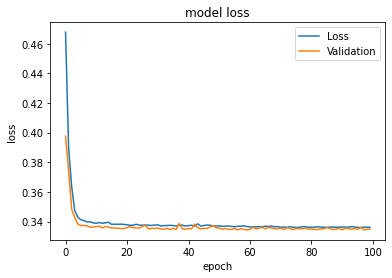

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation'], loc='upper right')
plt.show()

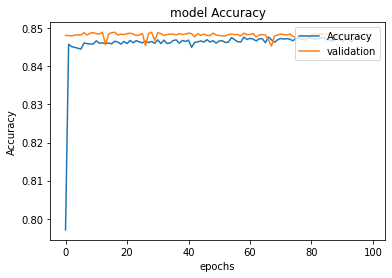

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Accuracy', 'validation'], loc='upper right')
plt.show()

In [99]:
model.evaluate(X_test,Y_test,verbose=0)

[0.3398149049580603, 0.84376514]

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [101]:
Y_hat = model.predict(X_test)
Y_hat

array([[0.209979],
       [0.000015],
       [0.218031],
       ...,
       [0.182702],
       [0.188274],
       [0.000015]], dtype=float32)

In [102]:
Y_hat = model.predict_classes(X_test)

print(confusion_matrix(Y_test, Y_hat))
print(classification_report(Y_test, Y_hat))

[[8613  102]
 [1513  109]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      8715
           1       0.52      0.07      0.12      1622

    accuracy                           0.84     10337
   macro avg       0.68      0.53      0.52     10337
weighted avg       0.80      0.84      0.79     10337



In [103]:
test1=test.values
test1

array([[1, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [104]:
test_scaled = Scaling.fit_transform(test1)

In [105]:
Y_hat1 = model.predict(test_scaled)

In [106]:
Y_hat1

array([[0.363575],
       [0.000015],
       [0.000015],
       ...,
       [0.000015],
       [0.000015],
       [0.000015]], dtype=float32)

In [107]:
import pandas as pd
df=pd.DataFrame(Y_hat1)


In [108]:
sub=pd.DataFrame()
sub['Policy ID'] = sample['Policy ID']
sub['Lapse']=df
sub.head(10)

,Policy ID,Lapse
0,PID_4928TWH,0.363575
1,PID_KBLLEGK,0.000015
2,PID_90F0QA3,0.000015
3,PID_18F3NHF,0.079681
4,PID_SX4QUVO,0.262885
5,PID_TU5BFPR,0.262885
6,PID_WLKPNBI,0.000019
7,PID_WJJ0O09,0.000023
8,PID_8GYR0BI,0.264277
9,PID_S2LWT7E,0.000015
